## K-means 클러스터링을 통한 국내 공공도서관 예산 예측하기 

#### 문제정의 : 
##### 최근 전국적인 공공도서관 예산 감축이 사회적으로 이슈가 되고 있다. 공공도서관은 주로 예산으로만 운영되기에 해당 년도의 국가 혹은 각 지자체에서 설정된 도서관 예산은 도서관의 도서 및 비도서 자료, 전자저널 구축비용과 사서와 같은 인력 비, 문화프로그램과 각종 정보 서비스 제공 비용 등 비용 배분에 큰 영향을 미친다. 도서관 예산은 크게 자료비, 인건비, 기타운영비가 있다. 이 중 도서관 예산에 가장 영향을 미치는 요소(관계)는 무엇인지 파악하고, 클러스터링을 통해 최소한으로 필요한 예산 등 적정 예산을 선정할 수 있도록 하고자 한다.

#### 예상결과  : 
##### 도서관 예산과 해당 데이터의 방문자 수와 가장 연관이 클 것이라고 생각한다. 그 이유는 반드시 도서관에서 책을 읽거나 서비스를 이용하지 않아도 도서관은 지역 시민의 이용을 통한 운영비에 가장 많은 투자를 할 것이라고 생각하기 때문에 도서관의 방문자 수가 많을 수록 도서관 예산에도 영향을 미칠 것이라고 생각한다.

#### 데이터 선택 : 
##### 1. 문화체육관광부_국가도서관통계_전국공공도서관정보.csv (publiclibrary.csv)
##### 전국 공공도서관의 지역(행정구역, 시군구), 장서수, 사서수, 대출자수, 대출권수, 예산 데이터가 존재한다. 장서 수, 사서 수를 통해 각각 자료비와 인건비에 들어가는 비용을 확인할 수 있으며, 대출자 수 및 대출권 수를 통해 도서관 이용빈도를 확인할 수 있다.


## 라이브러리 설치 및 데이터 전처리

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# 문화체육관광부_국가도서관통계_전국공공도서관정보.csv 파일 불러오기
df = pd.read_csv("./publiclibrary.csv")
df.head()
df.tail(10)
#사서 수 및 대출자 수 0값 확인

,평가년도,도서관구분,도서관코드,도서관명,행정구역,시군구,장서수,사서수,대출자수,대출권수,도서예산
1226,2022,LIBTYPE000002,2050142019,화천교육도서관,gangwon,화천군,52681,3.0,5421,10461,494360
1227,2022,LIBTYPE000002,2060842001,화천어린이도서관,gangwon,화천군,27294,1.0,958,33276,298397
1228,2022,LIBTYPE000002,2030841002,화홍어린이도서관,gyeonggi,수원시,11886,0.0,723,2166,34050
1229,2022,LIBTYPE000002,2050142014,횡성교육도서관,gangwon,횡성군,96183,3.0,7098,9875,378007
1230,2022,LIBTYPE000002,2060142030,횡성군립도서관,gangwon,횡성군,73915,2.0,2111,36387,901899
1231,2022,LIBTYPE000002,2060123005,효성도서관,incheon,계양구,47876,3.0,3918,57996,507765
1232,2022,LIBTYPE000002,2060811015,휘경어린이도서관,seoul,동대문구,35574,4.0,2991,64771,264734
1233,2022,LIBTYPE000002,20601110056,휘경행복도서관,seoul,동대문구,13769,3.0,6803,18582,324713
1234,2022,LIBTYPE000002,2060146026,흑산자산문화도서관,jeonnam,신안군,8944,0.0,0,122,88500
1235,2022,LIBTYPE000002,2030141004,희망샘도서관,gyeonggi,수원시,50143,4.0,6187,32133,247927


In [5]:
#분석에 필요한 열만 추출
df = df[['도서관명', '행정구역', '시군구', '장서수', '사서수', '대출자수', '대출권수', '도서예산']]
df.head()

,도서관명,행정구역,시군구,장서수,사서수,대출자수,대출권수,도서예산
0,2.28민주운동기념회관(도서관),daegu,중구,51037,2.0,995,14710,640298
1,4.19 혁명기념 도서관,seoul,종로구,62629,3.0,408,6059,2222667
2,가락몰도서관,seoul,송파구,35260,4.0,8381,81609,241180
3,가람도서관,gyeonggi,파주시,55922,7.0,18535,100189,848278
4,가수원도서관,daejeon,서구,163016,3.0,7500,191262,1586132


In [6]:
#열 이름 바꾸기
df.rename(columns = {df.columns[0] : 'LibraryName', df.columns[1] : 'region', df.columns[2] : 'city', df.columns[3] : 'books', df.columns[4] : 'librarian', df.columns[5] : 'borrower', df.columns[6] : 'borrowedbooks', df.columns[7] : 'budget'}, inplace = True)
df.head()

,LibraryName,region,city,books,librarian,borrower,borrowedbooks,budget
0,2.28민주운동기념회관(도서관),daegu,중구,51037,2.0,995,14710,640298
1,4.19 혁명기념 도서관,seoul,종로구,62629,3.0,408,6059,2222667
2,가락몰도서관,seoul,송파구,35260,4.0,8381,81609,241180
3,가람도서관,gyeonggi,파주시,55922,7.0,18535,100189,848278
4,가수원도서관,daejeon,서구,163016,3.0,7500,191262,1586132


In [7]:
#전체 행 개수 추출
len(df)
#총 1236행

1236

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LibraryName    1236 non-null   object 
 1   region         1236 non-null   object 
 2   city           1236 non-null   object 
 3   books          1236 non-null   int64  
 4   librarian      1236 non-null   float64
 5   borrower       1236 non-null   int64  
 6   borrowedbooks  1236 non-null   int64  
 7   budget         1236 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 77.4+ KB


In [9]:
#결측 값 확인
df.isnull().sum()

LibraryName      0
region           0
city             0
books            0
librarian        0
borrower         0
borrowedbooks    0
budget           0
dtype: int64

In [10]:
#정확한 결과를 위해 각 열의 0값이 있는 행 확인
#장서수 0인 행 확인 및 추출
idx1 = df[df['books'] == 0].index
print(idx1)

Index([1171], dtype='int64')


In [11]:
#사서수가 0인 행 확인 및 추철
idx2 = df[df['librarian'] == 0].index
print(idx2)

Index([  48,  130,  156,  157,  164,  244,  271,  301,  309,  366,  373,  387,
        410,  449,  455,  456,  501,  612,  643,  676,  682,  684,  687,  690,
        718,  756,  773,  796,  817,  830,  879,  880,  920,  928,  929,  985,
        996, 1018, 1078, 1089, 1117, 1123, 1126, 1142, 1155, 1187, 1195, 1228,
       1234],
      dtype='int64')


In [12]:
#대출자수가 0인 행 확인 및 추출
idx3 = df[df['borrower'] == 0].index
print(idx3)

Index([48, 181, 231, 449, 613, 687, 866, 996, 1023, 1070, 1123, 1171, 1192,
       1234],
      dtype='int64')


In [13]:
#대출권수가 0인 행 확인 및 추출
idx4 = df[df['borrowedbooks'] == 0].index
print(idx4)

Index([48, 181, 231, 449, 455, 613, 687, 866, 996, 1023, 1070, 1123, 1171,
       1192],
      dtype='int64')


In [14]:
#예산이 0인 행 확인 및 추출
idx5 = df[df['budget'] == 0].index
print(idx5)

Index([687, 1003], dtype='int64')


In [15]:
#각 열의 0인 행 제외하기
idx1 = df[df['books'] == 0].index
df.drop(idx1, inplace = True)

idx2 = df[df['librarian'] == 0].index
df.drop(idx2, inplace = True)

idx3 = df[df['borrower'] == 0].index
df.drop(idx3, inplace = True)

idx4 = df[df['borrowedbooks'] == 0].index
df.drop(idx4, inplace = True)

idx5 = df[df['budget'] == 0].index
df.drop(idx5, inplace = True)

len(df)
#전체 행 개수가 1236에서 1178개로 줄어든 것을 확인 

1178

In [16]:
df.describe()

,books,librarian,borrower,borrowedbooks,budget
count,1178.000000,1178.000000,1178.000000,1.178000e+03,1.178000e+03
mean,101895.898132,4.861630,13873.955008,1.168587e+05,1.140327e+06
std,86976.135881,4.370476,26286.262293,1.185657e+05,1.874232e+06
min,3567.000000,0.500000,50.000000,1.020000e+02,3.868000e+04
25%,47553.500000,2.000000,2840.750000,3.253225e+04,4.093908e+05
50%,77446.000000,3.000000,6994.500000,8.192300e+04,6.966595e+05
75%,125164.250000,6.000000,14275.250000,1.648738e+05,1.272098e+06
max,900474.000000,37.000000,488856.000000,1.250038e+06,4.794521e+07


## 요소간 관계 분석

Text(0.5, 1.0, 'Top region')

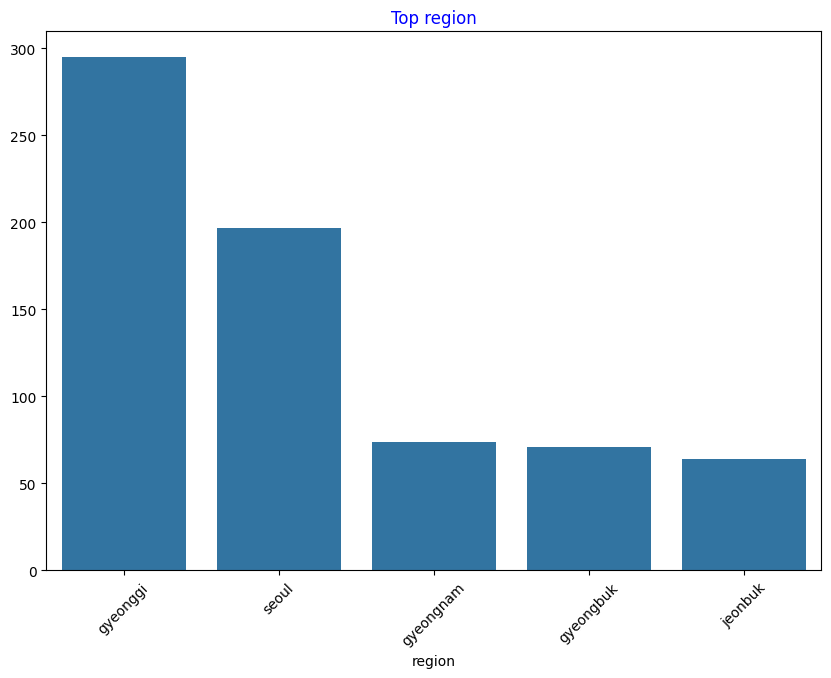

In [17]:
# 전국 공공도서관 수가 가장 많은 지역 확인 - 경기도

import seaborn as sns

top = df['region'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top region',color = 'blue')

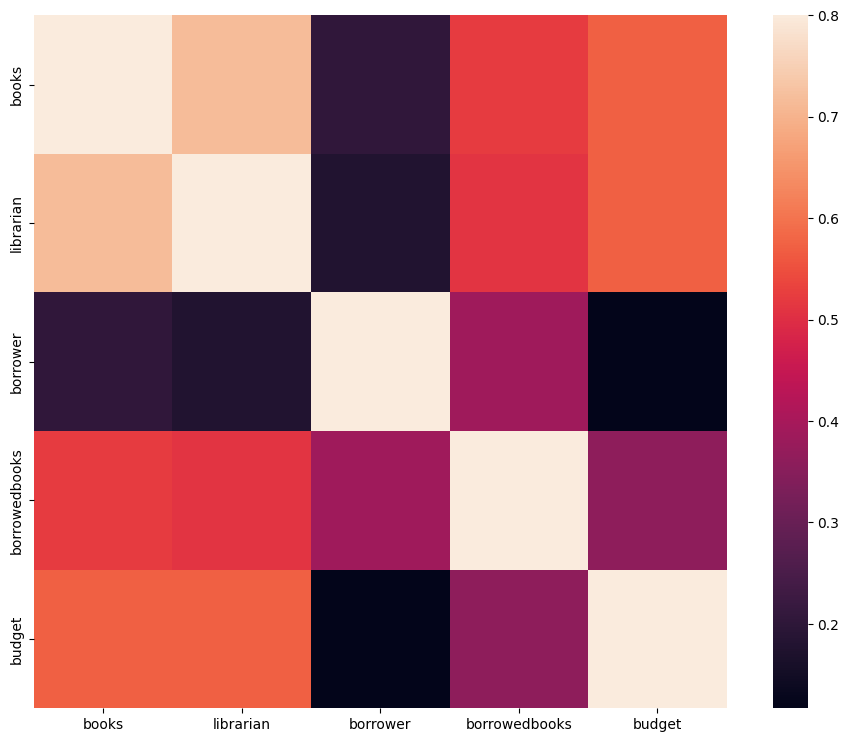

In [18]:
# 변수 간 상관관계 분석

df_modified = df.iloc[:, 3:]
corrmat = df_modified.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# 예산 측면에서 장서 수와 사서 수가 약 0.6으로 상관관계가 높게 나타난 것을 확인할 수 있다. 
# 장서 수와 사서 수가 도서관 예산에 영향을 주는 요소라는 것을 알 수 있다.

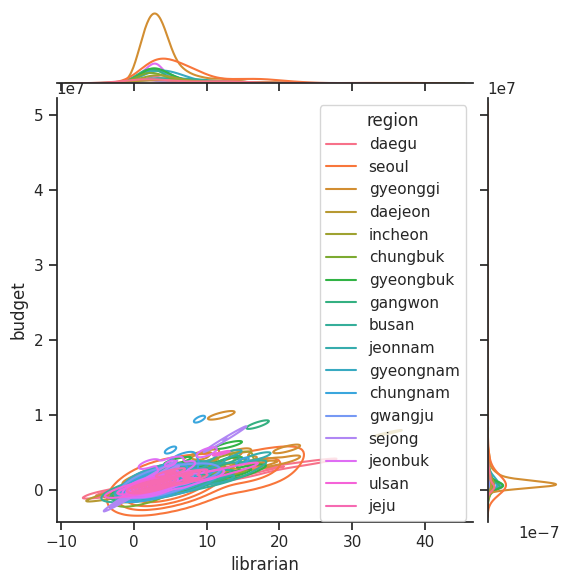

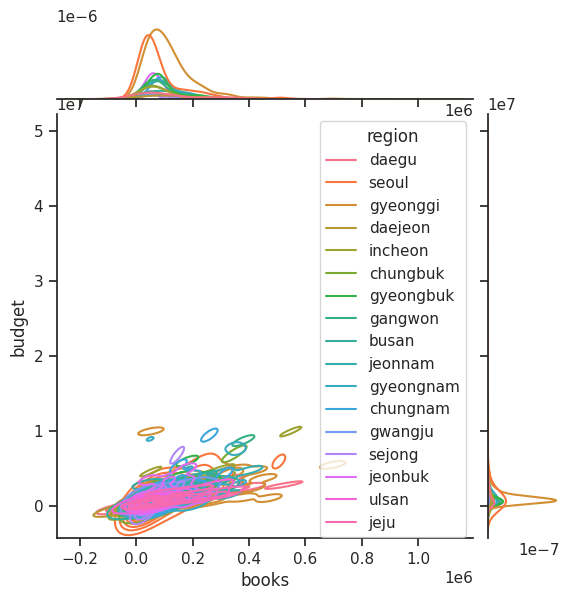

In [19]:
sns.set_theme(style="ticks")

#사서수 - 예산과의 분산
g = sns.jointplot(
    data = df,
    x="librarian", y="budget", hue="region",
    kind="kde",
)

#장서수 - 예산과의 분산
g = sns.jointplot(
    data = df,
    x="books", y="budget", hue="region",
    kind="kde",
)

#커넬밀도추정 장서 수-예산, 사서 수-예산 관계 확인 결과 동심원(분산)이 골고루 퍼져있지 않고 치우쳐져 있음을 알 수 있다. 

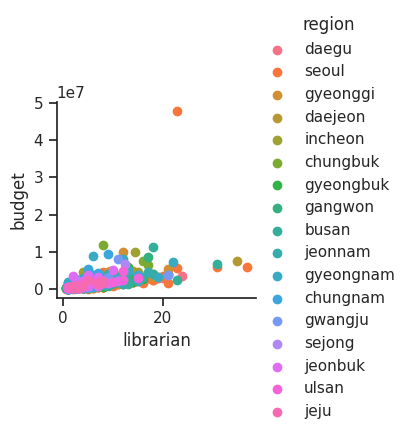

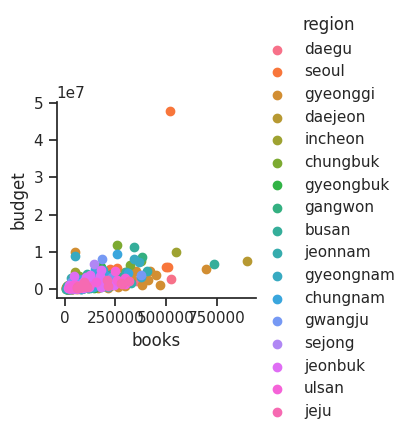

In [20]:
#사서 수 - 예산과의 관계
sns.FacetGrid(df, hue="region") \
   .map(plt.scatter, "librarian", "budget") \
   .add_legend()

#장서 수 - 예산과의 관계 
sns.FacetGrid(df, hue="region") \
   .map(plt.scatter, "books", "budget") \
   .add_legend()

# 예산 데이터에서 특정 데이터가 지나치게 높아 결과 분석이 이루어지지 않음을 확인하였다.
# 이상치 제거 필요

<Axes: xlabel='budget'>

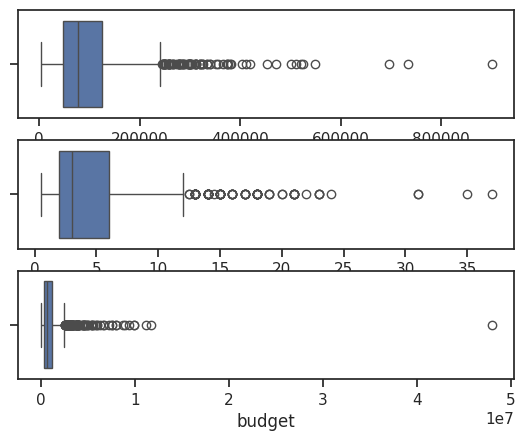

In [21]:
# 박스플롯을 통해 장서 수, 사서 수, 예산 값에서의 이상치 확인

#장서 수 박스플롯
plt.subplot(3,1,1)
sns.boxplot(x = 'books', data = df)

#사서 수 박스플롯
plt.subplot(3,1,2)
sns.boxplot(x = 'librarian', data = df)

#예산 박스플롯
plt.subplot(3,1,3)
sns.boxplot(x = 'budget', data = df)

In [22]:
#장서 수 데이터에서 이상치 및 이상치가 포함된 행 확인
idx6 = df[df['books'] >= 600000].index
print(idx6)

Index([61, 357, 473], dtype='int64')


In [23]:
df.loc[[61, 357, 473]]

,LibraryName,region,city,books,librarian,borrower,borrowedbooks,budget
61,경기평생교육학습관,gyeonggi,수원시,697002,21.0,7209,187287,5466124
357,대전광역시한밭도서관,daejeon,중구,900474,35.0,14808,415522,7583738
473,부산광역시립시민도서관,busan,부산진구,734787,31.0,24949,476063,6624996


In [24]:
#사서 수 데이터에서 이상치 및 이상치가 포함된 행 확인
idx7 = df[df['librarian'] > 30].index
print(idx7)

Index([357, 473, 554, 567], dtype='int64')


In [25]:
df.loc[[357, 473, 554, 567]]

,LibraryName,region,city,books,librarian,borrower,borrowedbooks,budget
357,대전광역시한밭도서관,daejeon,중구,900474,35.0,14808,415522,7583738
473,부산광역시립시민도서관,busan,부산진구,734787,31.0,24949,476063,6624996
554,서울특별시교육청남산도서관,seoul,용산구,501337,31.0,12243,196948,6005164
567,서울특별시교육청정독도서관,seoul,종로구,510043,37.0,115101,239467,5832407


In [26]:
#예산 데이터 중 최댓값이 있는 행을 찾는다.

import pandas as pd
df.idxmax()

LibraryName      1235
region            281
city              395
books             357
librarian         567
borrower          591
borrowedbooks     403
budget            546
dtype: int64

In [27]:
df.loc[546]
#확인 결과 서울도서관 예산이 다른 도서관에 비해 월등히 많은 것을 확인할 수 있다.

LibraryName         서울도서관
region              seoul
city                   중구
books              520954
librarian            23.0
borrower            22441
borrowedbooks      255653
budget           47945212
Name: 546, dtype: object

In [28]:
df = df.drop([61, 357, 473, 554, 567, 546]) 

#각 열에서 이상치가 있는 값(6개의 행)제거

In [29]:
len(df)
#총 6개의 행 삭제 확인

1172

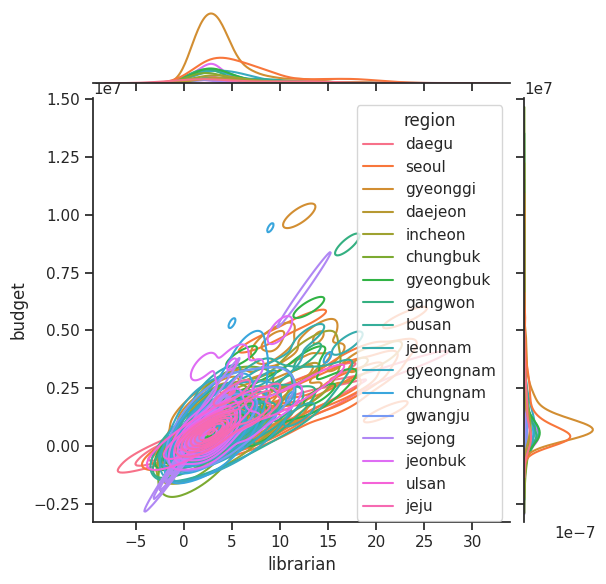

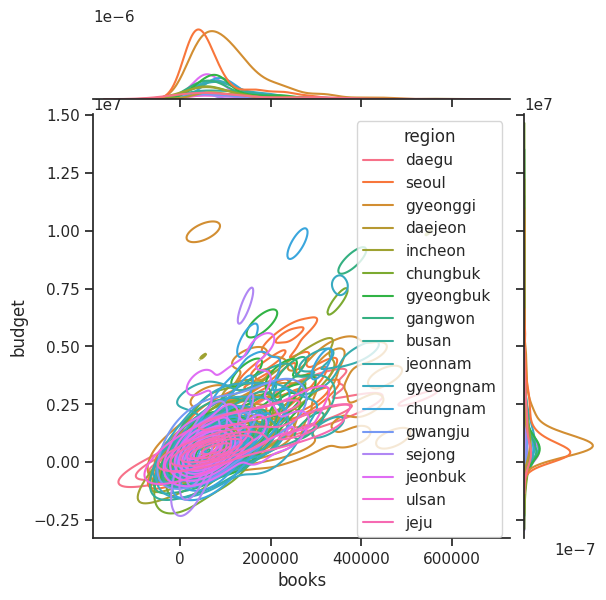

In [30]:
sns.set_theme(style="ticks")

#사서 수 - 예산과의 분산
g = sns.jointplot(
    data = df,
    x="librarian", y="budget", hue="region",
    kind="kde",
)

#장서 수 - 예산과의 분산
sns.set_theme(style="ticks")

g = sns.jointplot(
    data = df,
    x="books", y="budget", hue="region",
    kind="kde",
)

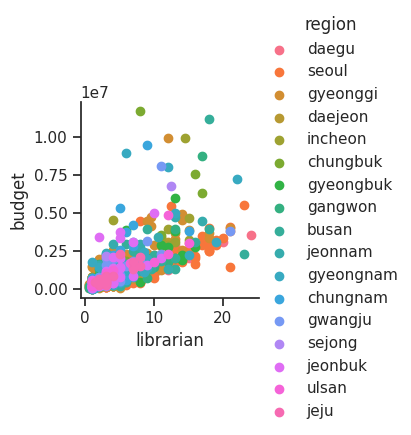

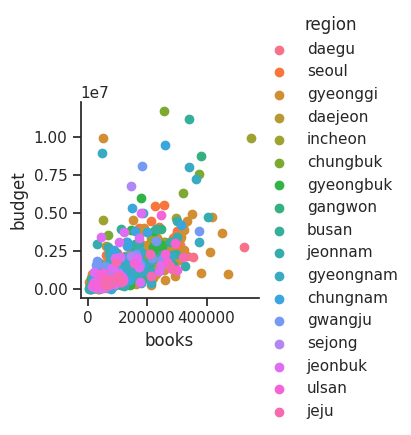

In [31]:
sns.FacetGrid(df, hue="region") \
   .map(plt.scatter, "librarian", "budget") \
   .add_legend()

sns.FacetGrid(df, hue="region") \
   .map(plt.scatter, "books", "budget") \
   .add_legend()

#사서 수와 예산, 장서 수와 예산 모두 비교적 선형관계임을 확인

## K-means클러스터링 적용

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

X = df.loc[:, ('books', 'librarian', 'borrower', 'borrowedbooks', 'budget')]

y = df['budget']

X['budget'] = le.fit_transform(X['budget'])

y = le.transform(y)

In [33]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [34]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

#실루엣 점수 : 0.4659167929206881

0.4659167929206881

In [35]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

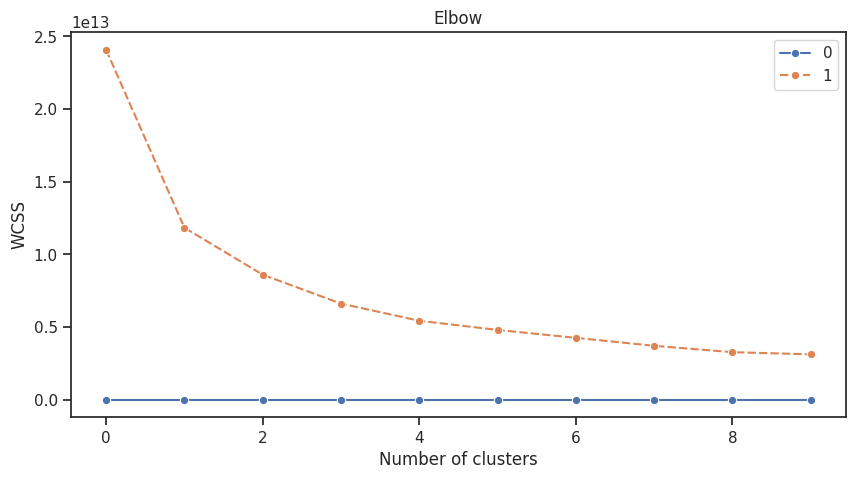

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#엘보우 방법을 통해 K = 3이 최적의 클러스터 수 임을 알 수 있다. 

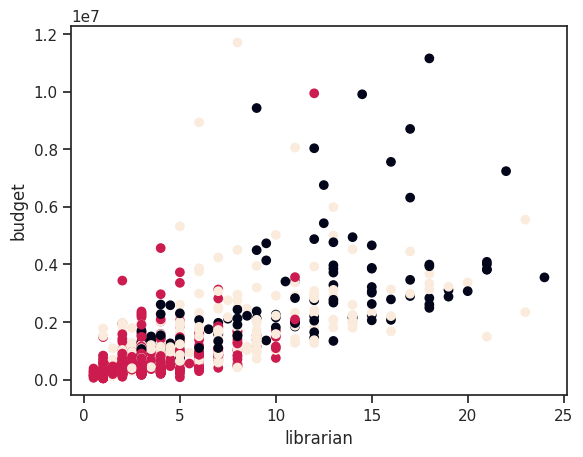

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['librarian'],df['budget'],c = labels)
plt.xlabel('librarian')
plt.ylabel('budget')
plt.show()

# 사서 수가 적을 수록 비교적 예산 수가 적은 편임을 알 수 있다.


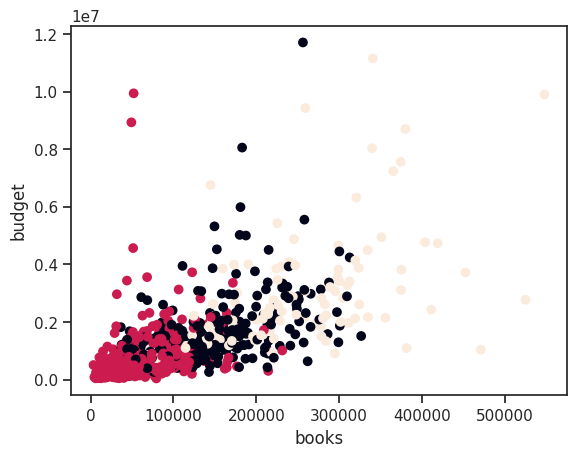

In [38]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['books'],df['budget'],c = labels)
plt.xlabel('books')
plt.ylabel('budget')
plt.show()

# 장서 수가 많을 수록 예산도 크게 들어가는 것을 알 수 있다. 

## 결과 분석 및 평가 :

#### 클러스터 분석 : 사서 수와 예산과의 클러스터에서는 중심점이 비교적 뚜렷하게 나타나지는 않지만, 장서 수와 예산과의 클러스터에서는 장서 수가 낮을 수록 예산이 적고 장서 수가 많을 수록 예산이 많다는 것을 알 수 있다. 

#### 평가 : 실루엣 점수는 0.4659167929206881이다. 1에 가까울 수록 분류가 잘 된 것인데, 0.5에 미치지 못하여 분류가 뚜렷하게 되지 않았다. 그 이유는 도서관 예산을 선정하는데, 사서 수(인력비), 장서 수, 운영비 뿐만 아니라 문화 프로그램과 같은 사업 비가 있으며, 특히 공공도서관에서는 전자저널을 구독하는데에도 많은 예산을 투자한다. 이러한 도서관 예산 선정에 들어가는 요소들을 복합적으로 분석해야하고 각 요소들의 분석을 통해 정확하게 분류가 될 수 있다는 것을 실루엣 분석을 통해 알 수 있다. 